In [48]:
# Import of all libraries used in project

# Data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models and optimizators
from sklearn.ensemble import RandomForestClassifier
import pyswarms

# Model metrics
from sklearn.metrics import accuracy_score,\
    precision_score,\
    recall_score,\
    f1_score

In [41]:
# Default configuration for data visualization
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# More in https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlib-rcparams
custom_backend_params = {
    'figure.dpi':150,
    'savefig.dpi':300
}
sns.set(rc=custom_backend_params)
sns.set_style(style='white')

In [47]:
# Use a seed for reproducibility purposes
np.random.seed(42)

In [3]:
df_stars = pd.read_csv(
    'data\star_classification.csv'
)

df_stars.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [64]:
# Renaming dataframe columns to better understanding
columns_mapper = {
    'obj_ID': 'object_id',
    'alpha': 'right_ascension_angle',
    'delta': 'declination_angle',
    'u': 'ultraviolet_filter',
    'g': 'green_filter',
    'r': 'red_filter',
    'i': 'near_infrared_filter',
    'z': 'infrared_filter',
    'run_ID': 'run_id',
    'rerun_ID': 'rerun_id',
    'cam_col': 'camera_column',
    'field_ID': 'field_id',
    'spec_obj_ID': 'spectroscopic_object_id',
    'class': 'class',
    'redshift': 'redshift',
    'plate': 'plate_id',
    'MJD': 'modified_julian_date',
    'fiber_ID': 'fiber_id'
}

df_stars.rename(
    columns=columns_mapper,
    inplace=True
)

In [58]:
# Mapping de Unique IDs, Input Features and Output Class columns of dataframe

input_columns = [
    'right_ascension_angle',
    'declination_angle',
    'ultraviolet_filter',
    'green_filter',
    'red_filter',
    'near_infrared_filter',
    'infrared_filter',
    'redshift',
    'camera_column',
    'plate_id'
]

output_column = ['class']

id_columns = [
    'object_id',
    'spectroscopic_object_id',
    'run_id',
    'rerun_id',
    'field_id',
    'plate_id',
    'fiber_id'
    'modified_julian_date',
]


In [63]:
# Keep only important columns in dataframe
df_stars = df_stars.loc[:, input_columns + output_column]
df_stars.describe()

,right_ascension_angle,declination_angle,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,infrared_filter,redshift,camera_column,plate_id
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661,3.511610,5137.009660
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707,1.586912,2952.303351
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971,1.000000,266.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517,2.000000,2526.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173,4.000000,4987.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154,5.000000,7400.250000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245,6.000000,12547.000000


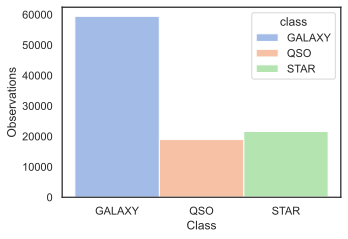

In [65]:

fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(5, 3.5)
)

sns.histplot(
    data=df_stars,
    x='class',
    hue='class',
    palette='muted'
)

plt.xlabel('Class')
plt.ylabel('Observations')

plt.show()

More than the half of observations are from the 'GALAXY' class with remaining rows almost equaly divided by the another two classes, 'STAR' and 'QSO' (quasar object).

In [71]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_stars[input_columns].to_numpy(),
    df_stars[output_column].to_numpy(),
    test_size=0.25,
    stratify=df_stars[output_column].to_numpy()
)

In [86]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train.ravel())
rfc_accuracy = rfc.score(X_test, y_test.ravel())
print(f'Accuracy score for test data: {100*rfc_accuracy:.2f}%')

Accuracy score for test data: 97.89%
